<a href="https://colab.research.google.com/github/EduVic/Practicas/blob/main/SRK_Tutorial_001_autologplotter_WorkingExampleVersion_EL_rev02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A) Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

B) Import the .csv or .xlsx spreadsheet containing your logging data as the object 'rawdata' (the spreadsheet has to be IN THE SAME FOLDER as this Jupyter notebook). In this example the spreadsheet is a merged table between data logged by SRK and data from Leapfrog (e.g. cobalt and copper assays, RQD, interval selection on lithocodes):

    B.1) For .csv files, uncomment:

In [ ]:
#rawdata = pd.read_csv("SRK_Tutorial_001_Merged_Leapfrog_SRKlogging_data.csv", encoding = 'utf8')

    B.2) For .xlsx files, uncomment:

In [ ]:
rawdata = pd.read_excel("SRK_Tutorial_001_Merged_Leapfrog_SRKlogging_data.xlsx")

    B.3) Preview the first 5 lines from the object 'rawdata':

In [ ]:
rawdata.head()

,holeid,from,to,Alt1_Description,Alt1_Int,Colour_Description,Lith1_Description,Lith1_Grainsize,Lith1_Structure_Description,Lith1_Texture_Description,...,veining_abundance,associated_mineralogy,key_planar_structure,mineralized_planar_structure,orientation,planar_feature_note,planar_feature_photos,planar_feature_type,alpha,created_at
0,MCD17001,0.00,4.25,NaN,NaN,NaN,Oal alluvium,NaN,NaN,"Overburden, not included in core tray",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,MCD17001,4.25,4.50,Chlorite,v wk,Dark green to black,Vvm mafic volcanic,fg,Variably foliated with locally strong deformat...,Variable foliated and deformed (local strong z...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,MCD17001,4.50,5.00,Chlorite,v wk,Dark green to black,Vvm mafic volcanic,fg,Variably foliated with locally strong deformat...,Variable foliated and deformed (local strong z...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,MCD17001,5.00,6.00,Chlorite,v wk,Dark green to black,Vvm mafic volcanic,fg,Variably foliated with locally strong deformat...,Variable foliated and deformed (local strong z...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,MCD17001,6.00,7.00,Chlorite,v wk,Dark green to black,Vvm mafic volcanic,fg,Variably foliated with locally strong deformat...,Variable foliated and deformed (local strong z...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


C) Display the name and data type for each column of the imported table called 'rawdata' (later used for selecting which column to select for the graphical log):

In [ ]:
print(rawdata.dtypes)

holeid                                   object
from                                    float64
to                                      float64
Alt1_Description                         object
Alt1_Int                                 object
Colour_Description                       object
Lith1_Description                        object
Lith1_Grainsize                          object
Lith1_Structure_Description              object
Lith1_Texture_Description                object
Min_Composition                          object
Vein1                                    object
Vein1_Description                        object
Min1_Pct                                float64
Vein1_Pct                               float64
SAMPLE_NUM                               object
AG                                      float64
AS                                      float64
AU                                      float64
CO                                      float64
CU                                      

D) Display all unique values in the column 'SRK_litho_interval_selection' from the object 'rawdata' (used later for attributing numerical values to each lithology and plotting them):

In [ ]:
rawdata['SRK_litho_interval_selection'].unique()

array(['Overburden', 'Mafic volcanic', 'Inferred_olive-green_dyke_03',
       'Metased_01', 'Magnetic_dyke_02', 'Olive-green dyke', 'Metased_04',
       nan, 'Inferred_olive-green_dyke_01', 'Metasedimentary rocks',
       'Magnetic_Dyke_01', 'Fault', 'Inferred_olive-green_dyke_02',
       'Felsic intrusive', 'Massive sulphides', 'Fld-porphyry',
       'Metased_05', 'Metased_03', 'Metaseds_lowconfidence_03',
       'Metaseds_lowconfidence_01'], dtype=object)

E) Create a new column 'SRK_Leapfrog_litho' and attribute a numerical value to the lithologies you want to display on the final graphical log:

    E.1) Copy the column 'SRK_litho_interval_selection' from the object 'rawdata' to a new column called 'SRK_logging_litho':

In [ ]:
rawdata['SRK_Leapfrog_litho'] = rawdata['SRK_litho_interval_selection']

    E.2) Replace the content of column 'SRK_Leapfrog_litho' by attributing an arbitrary numerical value based on the lithologies you want to display. This step can also be used to simplify the 'SRK_litho_interval_selection' column by only selecting some lithologies or grouping lithologies together. For example below, all the lithocodes for olive_green_dyke are merged into group 6. The group -1 is reserved for missing data (NaN) or lithocodes that you did not select.

    Note the content of the if/elif loops below versus the indidual lithocodes above: 'Metased_05' and 'Metaseds_lowconfidence_03' are both grouped into group 2. Also remember that the code is read from top to bottom, so if a cell in column 'SRK_litho_interval_selection' contains both 'Mafic volcanic' and 'Fault', the content of this cell will first be replaced by the number 10 and will not be attributed the value 1 from 'Mafic volcanic'. This is however based on the way I personnaly log and you can modify as needed:

In [ ]:
for index,value in rawdata['SRK_Leapfrog_litho'].iteritems():
    if value is not np.nan:

        if 'Overburden' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '12'

        elif 'Fault' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '10'

        elif 'Magnetic_' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '9'

        elif 'Felsic intrusive' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '8'

        elif 'Fld-porphyry' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '7'

        elif 'live-green' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '6'

        elif 'Massive sulphides' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '3'

        elif 'Metased' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '2'

        elif 'Mafic volcanic' in value:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '1'

        else:
            rawdata.at[index, 'SRK_Leapfrog_litho'] = '-1'
    else:
        rawdata.at[index, 'SRK_Leapfrog_litho'] = '-1'

F) Display all unique values in the column 'lithology' from the object 'rawdata':

In [ ]:
rawdata['lithology'].unique()

array([nan, 'Mafic_volcanic_rock',
       'Diabase_Dolerite,Grey-Green dyke,Mafic_intrusive_rock',
       'Mafic_volcanic_rock,Mylonite_Shear_zone', 'Undif_vein',
       'Shale,Undif_metasedimentary_rock',
       'Sandstone,Undif_metasedimentary_rock',
       'Cataclasite,Undif_metasedimentary_rock',
       'Undif_metasedimentary_rock', 'Massive_sulphides',
       'Cobaltite rich zone,Undif_metasedimentary_rock',
       'Grey-Green dyke,Mafic_intrusive_rock', 'Mylonite_Shear_zone',
       'Diabase_Dolerite,Mafic_intrusive_rock', 'Diabase_Dolerite',
       'Cataclasite,Shale,Undif_metasedimentary_rock', 'Breccia_vein',
       'Breccia_vein,Cataclasite',
       'Breccia_vein,Cataclasite,Undif_metasedimentary_rock',
       'Mafic_volcanic_rock,Undif_vein', 'Grey-brown mafic dyke',
       'Grey-Brown mafic dyke,Mafic_volcanic_rock',
       'Grey-Brown mafic dyke', 'Cataclasite', 'Grey-Green mafic dyke',
       'Felsic_intrusive', 'Greywacke,Undif_metasedimentary_rock',
       'Mafic_intrus

G) Create a new column 'SRK_logging_litho' and attribute a numerical value to the lithologies you want to display on the final graphical log:

    G.1) Create a copy of column 'lithology' called 'SRK_logging_litho':

In [ ]:
rawdata['SRK_logging_litho'] = rawdata['lithology']

    G.2) Replace the content of column 'SRK_logging_litho' by attributing an arbitrary numerical value based on the lithologies you want to display. This step can also be used to simplify the content of the 'lithology' column by only selecting some lithologies or grouping lithologies together. For example below, 'Cataclasite' and 'Fault gouge' have been merged together in group 10:

In [ ]:
for index,value in rawdata['SRK_logging_litho'].iteritems():
    if value is not np.nan:

        if 'Breccia_vein' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '11'

        elif 'Cataclasite' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '10'

        elif 'Fault gouge' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '10'

        elif 'Diabase_Dolerite' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '9'

        elif 'dyke' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '5'

        elif 'Felsic_intrusive' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '8'

        elif 'Mylonite_Shear_zone' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '4'

        elif 'Undif_metasedimentary_rock' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '2'

        elif 'Mafic_volcanic_rock' in value:
            rawdata.at[index, 'SRK_logging_litho'] = '1'

        else:
            rawdata.at[index, 'SRK_logging_litho'] = '-1'
    else:
        rawdata.at[index, 'SRK_logging_litho'] = '-1'

H) Create a simplified table/object called 'data_check' from selected columns in object 'rawdata', this is only used to check the numerical coding of columns 'SRK_Leapfrog_litho' and 'SRK_logging_litho' worked:

In [ ]:
data_check = rawdata.loc[:,['SRK_litho_interval_selection','SRK_Leapfrog_litho','lithology','SRK_logging_litho']]

    H.1) Display a sample (5 records) from the table/object called 'data_check'. This is only used to check the numerical coding of columns 'SRK_Leapfrog_litho' and 'SRK_logging_litho' worked:

In [ ]:
data_check.sample(5)

,SRK_litho_interval_selection,SRK_Leapfrog_litho,lithology,SRK_logging_litho
5195,NaN,-1,NaN,-1
125,Magnetic_dyke_02,9,NaN,-1
9060,Mafic volcanic,1,NaN,-1
6890,Mafic volcanic,1,NaN,-1
2139,Inferred_olive-green_dyke_03,6,NaN,-1


I) Select the columns you want to plot from the table/object 'rawdata'. The data-subset/object created is called 'data_selected_raw'. It contains the column 'holeid', 'from', 'to', ...etc as well as the columns we created above 'SRK_Leapfrog_litho' and 'SRK_logging_litho':

In [ ]:
dataselected_raw = rawdata.loc[:,['holeid','from','to','CO','SRK_Leapfrog_litho','SRK_logging_litho','RQD_pc','brittle_deformation_intensity','ductile_deformation_intensity','global_alteration_intensity','sulphide_abundance','veining_abundance','planar_feature_type','alpha']]
dataselected_raw.sample(5)

,holeid,from,to,CO,SRK_Leapfrog_litho,SRK_logging_litho,RQD_pc,brittle_deformation_intensity,ductile_deformation_intensity,global_alteration_intensity,sulphide_abundance,veining_abundance,planar_feature_type,alpha
5985,MCD18024,53.0,53.6,0.007,1,-1,83.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7935,MCD18030,114.0,115.0,0.006,1,2,100.00,1.0,3.0,3.0,2.0,2.0,NaN,NaN
6379,MCD18024,390.0,391.0,0.005,1,-1,96.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7898,MCD18030,85.0,86.0,0.007,1,-1,88.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6762,MCD18025,212.4,213.0,0.005,1,-1,86.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


J) Select only the data for the hole you logged from 'dataselected_raw' and assign them to the table/object named 'dataselected':

In [ ]:
hole_selected = 'MCD18030'
dataselected = dataselected_raw.loc[dataselected_raw['holeid'] == hole_selected, :]

    J.1) Display (for verification) the first 5 rows of the table/object 'dataselected' that will be used to plot the graphical log:

In [ ]:
dataselected.head(5)

,holeid,from,to,CO,SRK_Leapfrog_litho,SRK_logging_litho,RQD_pc,brittle_deformation_intensity,ductile_deformation_intensity,global_alteration_intensity,sulphide_abundance,veining_abundance,planar_feature_type,alpha
7785,MCD18030,6.0,7.0,0.070,1,-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7786,MCD18030,7.0,8.0,0.084,1,-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7787,MCD18030,8.0,9.0,0.067,1,-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7788,MCD18030,9.0,10.0,0.027,1,-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7789,MCD18030,10.0,11.0,0.014,1,-1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


K) Creating the graphical plot:

    K.1) Calculate the maximum depth of the selected hole and assign it to the object called 'max_depth' for later use. It is also printed for verification:

In [ ]:
max_depth_id = dataselected['to'].idxmax()
max_depth = dataselected.loc[max_depth_id, 'to']
print('Max depth is = ', max_depth)

Max depth is =  165.0


    K.2) Define the x axis as the column 'to' and the number of subplots you want (defined by the number of variables you want to display in your graphical log):

In [ ]:
x = dataselected.loc[:, 'to']

number_of_subplots = 8

    K.3) Define the variables you want to plot. In this example the lithologies extracted from Leapfrog (assigned to the variable y1) and the ones logged by SRK (y1b) will be superposed on the same subplot/diagram for easier comparison:

In [ ]:
y = dataselected.loc[:, 'CO']
y1 = dataselected.loc[:, 'SRK_Leapfrog_litho'].astype(float)
y1b = dataselected.loc[:, 'SRK_logging_litho'].astype(float)
y2 = dataselected.loc[:, 'RQD_pc']
y3 = dataselected.loc[:, 'brittle_deformation_intensity']
y4 = dataselected.loc[:, 'ductile_deformation_intensity']
y5 = dataselected.loc[:, 'global_alteration_intensity']
y6 = dataselected.loc[:, 'sulphide_abundance']
y7 = dataselected.loc[:, 'veining_abundance']

    K.4) Define the number of rows (= number_of_subplots; 8 here), number of columns (1 here), and the subplots/diagrams size (in inches?):
    
    K.5) Define what variables to use to plot each subplot/diagram (typically x and one of the y defined above, but you can display other things). As you may guess, each subplot/diagram is designated by axs[i] with i from 0 (for the first one) to any number of subplots/diagrams you want.
    
    In this example the subplots/diagrams for (x,y1) and (x,y1b) are superposed, one filled (x,y1), the other not (x,y1b). You can define personnalized colors for each plot by modyfing the color name, as long as you keep matplotlib standards (https://matplotlib.org/examples/color/named_colors.html). The alpha value is for transparency:
    
    K.6) Add a label for each subplot/diagram and choose the minimum and maximum range for each subplot/diagram ordinate axis. For the lithologies, make sure the group numbers assigned at the beginning correspond to the right lithology:
    
    K.7) Make sure each subplot/diagram has the same range in abscissa (from 0 to 'max_depth' + 1 meter) and add a grid to all subplots/diagrams:
    
    K.8) Plot the final result of your graphical log with the holeid as title:

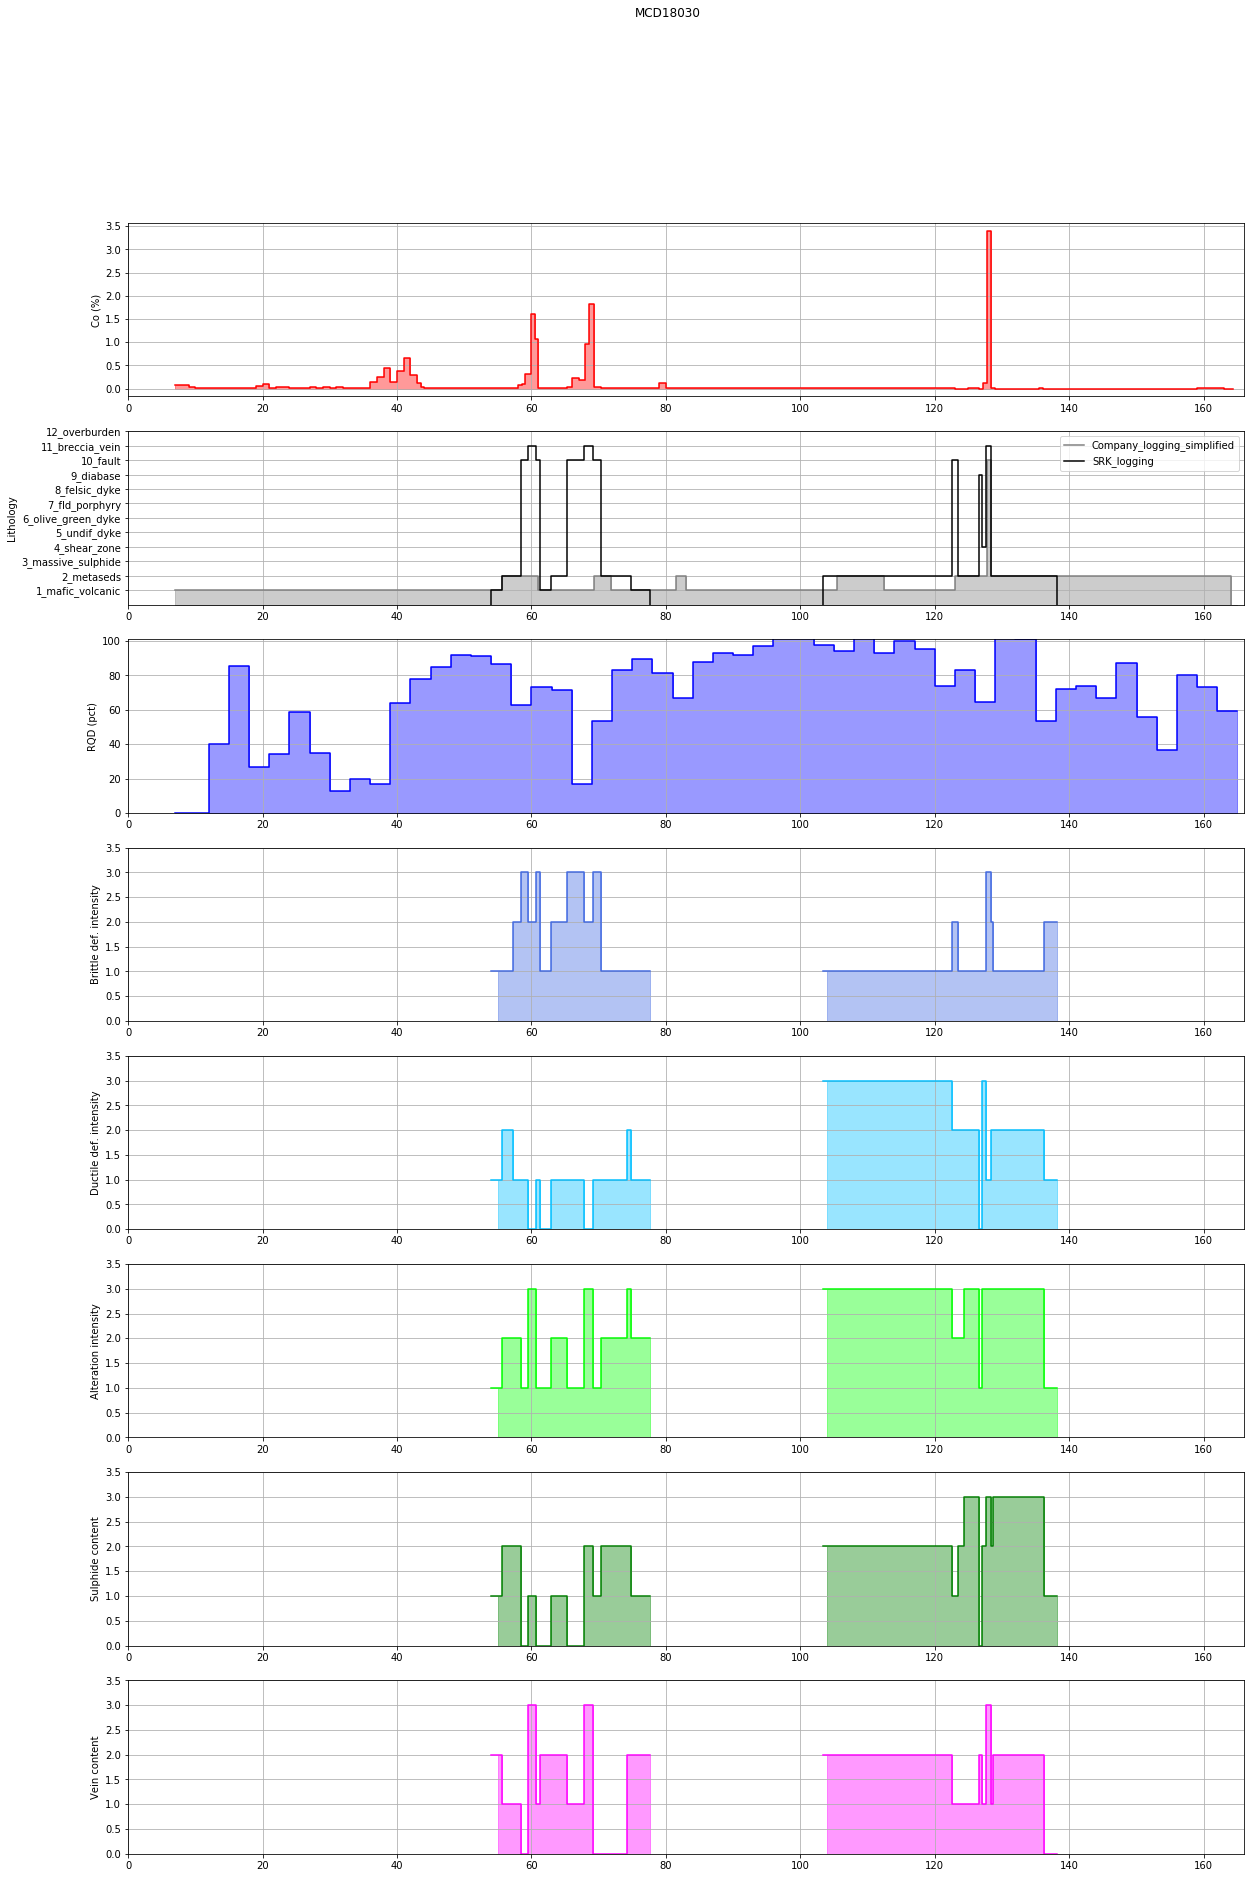

In [ ]:
fig, axs = plt.subplots(number_of_subplots, 1, figsize = (20,30))

#________________________________________________________________________

axs[0].step(x, y, color= 'red')
axs[0].fill_between(x, y, step="pre", color= 'red', alpha=0.4)

axs[1].step(x, y1, color= 'grey')
axs[1].fill_between(x, y1, step="pre", color= 'grey', alpha=0.4)
axs[1].step(x, y1b, color= 'black')

axs[2].step(x, y2, color= 'blue')
axs[2].fill_between(x, y2, step="pre", color= 'blue', alpha=0.4)

axs[3].step(x, y3, color= 'royalblue')
axs[3].fill_between(x, y3, step="pre", color= 'royalblue', alpha=0.4)

axs[4].step(x, y4, color= 'deepskyblue')
axs[4].fill_between(x, y4, step="pre", color= 'deepskyblue', alpha=0.4)

axs[5].step(x, y5, color= 'lime')
axs[5].fill_between(x, y5, step="pre", color= 'lime', alpha=0.4)

axs[6].step(x, y6, color= 'green')
axs[6].fill_between(x, y6, step="pre", color= 'green', alpha=0.4)

axs[7].step(x, y7, color= 'magenta')
axs[7].fill_between(x, y7, step="pre", color= 'magenta', alpha=0.4)

#________________________________________________________________________

axs[0].set(xlabel='', ylabel='Co (%)', title='')

axs[1].set(xlabel='', ylabel='Lithology', title='')
plt.sca(axs[1])
y_litho_nb = [12,11,10,9,8,7,6,5,4,3,2,1]
y_litho = ['12_overburden','11_breccia_vein','10_fault','9_diabase','8_felsic_dyke','7_fld_porphyry','6_olive_green_dyke',
           '5_undif_dyke','4_shear_zone','3_massive_sulphide','2_metaseds','1_mafic_volcanic']
plt.yticks(y_litho_nb, y_litho, color='black')

axs[1].set_ylim(0, y_litho_nb[0])
axs[1].legend(['Company_logging_simplified', 'SRK_logging'])

axs[2].set(xlabel='', ylabel='RQD (pct)', title='')
axs[2].set_ylim(0, 101)

axs[3].set(xlabel='', ylabel='Brittle def. intensity', title='')
axs[3].set_ylim(0, 3.5)

axs[4].set(xlabel='', ylabel='Ductile def. intensity', title='')
axs[4].set_ylim(0, 3.5)

axs[5].set(xlabel='', ylabel='Alteration intensity', title='')
axs[5].set_ylim(0, 3.5)

axs[6].set(xlabel='', ylabel='Sulphide content', title='')
axs[6].set_ylim(0, 3.5)

axs[7].set(xlabel='', ylabel='Vein content', title='')
axs[7].set_ylim(0, 3.5)

#________________________________________________________________________

for i in range(0, number_of_subplots, 1):    #(start, stop, step size)
    axs[i].set_xlim(0, max_depth+1)
    axs[i].grid()

#________________________________________________________________________

plt.suptitle(hole_selected)
plt.show()

L) Saves the figure as a .PNG image:

In [ ]:
figure = axs[1].get_figure()
figure.savefig("{}.png".format(hole_selected))